In [9]:
from timeit import timeit
from random import shuffle
import pandas as pd
import datetime
import numpy as np

In [10]:
def indexes_naive(lst, target):      
    for item_i, item1 in enumerate(lst):
        for item_j, item2 in enumerate(lst):
            if item_i != item_j and item1 + item2 == target:
                return [item_i, item_j]

In [11]:
def indexes_in (lst, target):
	for i, val in enumerate(lst):
		if (target - val) in lst and i != lst.index(target - val):
			return [i, lst.index(target - val)]

In [15]:
def indexes_sort(lst, target):
    sorted_lst, old_index = zip(*sorted(zip(lst, range(len(lst)))))
    finger1, finger2 = 0, len(sorted_lst)-1
    while finger1 != finger2:
        cur_sum = sorted_lst[finger1] + sorted_lst[finger2]
        if cur_sum < target:
            finger1 += 1
        elif cur_sum > target:
            finger2 -= 1
        else:
            return [old_index[finger1], old_index[finger2]] 

In [18]:
a = [1,3,2]
dict(zip(a, range(len(a))))

{1: 0, 3: 1, 2: 2}

In [24]:
# based on https://stackoverflow.com/a/8373832/387408
def indexes_fast(lst, target):
    # если у нас два одинаковых числа образуют сумму, то словарь попадет индекс последнего
    # из-за этого мы не выведем два одинаковых индекса
    lst_dict = dict(zip(lst, range(len(lst))))
    for index_i, item_i in enumerate(lst):
        if target - item_i in lst_dict: 
            return [index_i, lst_dict[target - item_i]]

In [22]:
nums = [15, 2, 7, 11, 8]
target = 9
print(indexes_naive(nums, target))
print(indexes_in(nums, target))
print(indexes_sort(nums, target))
print(indexes_fast(nums, target))

[1, 2]
[1, 2]
[1, 2]
[1, 2]


In [25]:
nums = [0, 0, 4, 4, 0, 0]
target = 8
print(indexes_naive(nums, target))
print(indexes_in(nums, target))
print(indexes_sort(nums, target))
print(indexes_fast(nums, target))

[2, 3]
[3, 2]
[2, 3]
[2, 3]


In [39]:
# словарь, ключ - длина списка без двух элементов, значение - список с двумя таймингами
timings = {}
funs = [# lambda: indexes_naive(curr, target), 
         # lambda: indexes_in(curr, target), 
        lambda: indexes_sort(curr, target),
        lambda: indexes_fast(curr, target)
        ]
for i in range(2, 20):
    timings[2**i] = [0]*len(funs)
    
# print(timings)
# Мы будем использовать значения 2 и 7, а остальные - нули

repeats = 10 # сколько перестановок делать
local_repeats = 5 # количество повторений с одинаковым списком

for n in timings:
	print(datetime.datetime.now(), ": n =", n)
	curr = [2, 7] + [0]*n 
	for _ in range(100):
		shuffle(curr)
		# print(curr)
		for i,_ in enumerate(funs):
			timings[n][i] += timeit(funs[i], number = local_repeats)
			
		for i,_ in enumerate(funs):
			timings[n][i] /= local_repeats*repeats

# timings

2021-12-19 02:56:37.372628 : n = 4
2021-12-19 02:56:37.393381 : n = 8
2021-12-19 02:56:37.415782 : n = 16
2021-12-19 02:56:37.442949 : n = 32
2021-12-19 02:56:37.474491 : n = 64
2021-12-19 02:56:37.510067 : n = 128
2021-12-19 02:56:37.564884 : n = 256
2021-12-19 02:56:37.645109 : n = 512
2021-12-19 02:56:37.798871 : n = 1024
2021-12-19 02:56:38.067851 : n = 2048
2021-12-19 02:56:38.691802 : n = 4096
2021-12-19 02:56:39.857074 : n = 8192
2021-12-19 02:56:41.875528 : n = 16384
2021-12-19 02:56:46.169283 : n = 32768
2021-12-19 02:56:55.643345 : n = 65536
2021-12-19 02:57:14.277629 : n = 131072
2021-12-19 02:57:53.566164 : n = 262144
2021-12-19 02:59:15.023598 : n = 524288


In [56]:
res = pd.DataFrame(timings).transpose().reset_index()
# res.columns = ['n', 'indexes_naive', 'indexes_in', 'indexes_sort', 'indexes_fast']
res.columns = ['n',  'indexes_sort', 'indexes_fast']
res['indexes_sort'] /= res['n'] *np.log(res['n'])
res['indexes_fast'] /= res['n'] 
# res['ratio'] = res['indexes_naive']/res['indexes_in']
res

,n,indexes_sort,indexes_fast
0,4,6.162932e-08,5.247661e-08
1,8,3.874616e-08,4.781537e-08
2,16,2.844520e-08,3.262158e-08
3,32,1.171403e-08,1.623468e-08
4,64,7.568914e-09,1.302200e-08
5,128,5.597496e-09,1.128081e-08
6,256,5.766172e-09,1.082903e-08
7,512,4.250672e-09,1.155187e-08
8,1024,3.865630e-09,1.138740e-08
9,2048,3.815329e-09,1.793843e-08


<AxesSubplot:xlabel='n'>

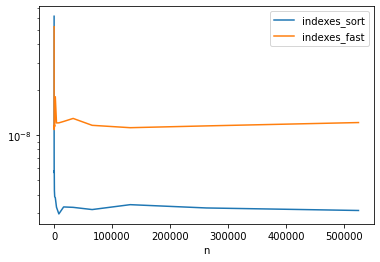

In [57]:
# res.plot(x = "n", y = ["indexes_naive", "indexes_in", "indexes_sort", "indexes_fast"], loglog = True)
res.plot(x = "n", y = ["indexes_sort", "indexes_fast"], logy = True)